# The solar irradiance is the output of light energy from the entire disk of the Sun, measured at the Earth. 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [20]:
df = pd.read_csv("global_heat_index.csv")


In [21]:
df

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
...,...,...,...,...,...,...,...,...,...,...,...
17515,2012,12,31,19,-6,14.702595,984.779114,22.647353,54.538628,3.383211,0
17516,2012,12,31,20,-6,13.823766,985.189148,23.993252,61.517830,3.519155,0
17517,2012,12,31,21,-6,12.951590,984.829224,25.759637,65.096191,3.518434,0
17518,2012,12,31,22,-5,12.138259,984.735046,27.901296,66.668427,3.400819,0


In [22]:
clean1 = df[df['Hour']<6]
clean2 = df[df['Hour']>18]

df = df.drop(clean1.index, axis = 0)
df = df.drop(clean2.index, axis = 0)

In [23]:
df.isnull().sum()

Year                     0
Month                    0
Day                      0
Hour                     0
Dew Point                0
Temperature              0
Pressure                 0
Relative Humidity        0
Wind Direction           0
Wind Speed               0
Solar Radiation (GHI)    0
dtype: int64

# apply random forest

In [24]:
from sklearn.ensemble import RandomForestRegressor


# data slicing

In [25]:
x = df.drop(['Solar Radiation (GHI)'], axis = 1)
y = df['Solar Radiation (GHI)']

In [26]:
x

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695
...,...,...,...,...,...,...,...,...,...,...
17510,2012,12,31,14,-8,24.219059,983.661621,10.363324,5.771851,1.837763
17511,2012,12,31,15,-9,22.715263,983.482239,11.240004,8.507614,1.937734
17512,2012,12,31,16,-7,19.968041,983.660339,14.983540,17.507896,2.191131
17513,2012,12,31,17,-5,16.706517,983.768677,21.564891,29.407814,2.675606


In [27]:
y

6          0
7          0
8        159
9        363
10       533
        ... 
17510    553
17511    408
17512    221
17513     16
17514      0
Name: Solar Radiation (GHI), Length: 9490, dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)


In [29]:
rf_regressor =RandomForestRegressor(1000)

rf_regressor.fit(xtrain, ytrain)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


RandomForestRegressor(n_estimators=1000)

In [30]:
ypred = rf_regressor.predict(xtest)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


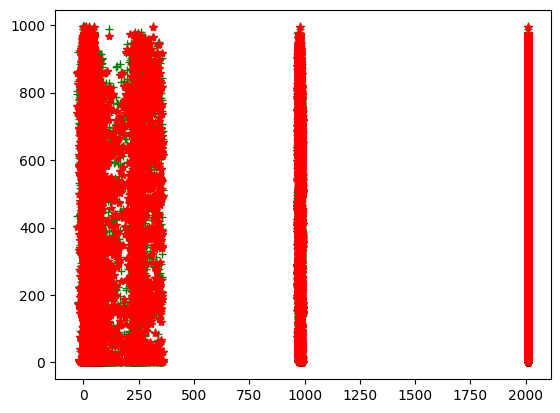

In [31]:
plt.plot(xtest,ytest,"+",color='green')
plt.plot(xtest,ypred,'*',color='red')

In [32]:
mean_squared_error(ypred, ytest)


4985.232770679663

# Let us use multiple regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


LinearRegression()

In [35]:
predicted_value = lr.predict(xtest)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


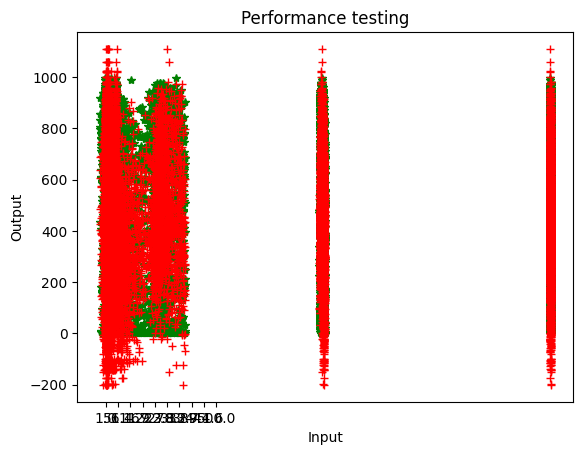

In [36]:
plt.plot(xtest, ytest, "*", color = "green")
plt.plot(xtest, predicted_value, "+", color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 500, 10))
plt.ylabel("Output")
plt.show()

In [37]:
mean_squared_error(predicted_value, ytest)


47494.939007364555